In [3]:
from parton_splittings_gpu import *
import numpy as np

import torch

f_sol = np.load("fsol.py")
sis = phsys(100, 0.4, 1.5, 1.5) #E, z, qF, Medium size (grid)
sis.set_dim(46,46,40,40) #Grid dimensions
sis.set_fsol(f_sol)
sis.set_t(5.85)

print(sis.V1)
fit = torch.load("saved_fits/new_fit_11.pth", weights_only=False)
fit.eval()

FileNotFoundError: [Errno 2] No such file or directory: 'fsol.py'

In [20]:
Theta = np.arange(0.01, 0.15, 0.01)
Fp_an  = .0 * Theta
Fp_sim = .0 * Theta

#torch.cuda.empty_cache()
for th in range(len(Theta)):
    fp = np.real(fasit2Ncdiagint(sis.t, sis.omega*Theta[th], 0, sis.z, sis.omega, sis.Omega, sis.qhat))

    print("Computing theta = ", Theta[th])
    U1 = np.linspace(-sis.L/2, sis.L/2, 256)
    U2 = np.linspace(-sis.L/2, sis.L/2, 256)
    V1 = np.linspace(-sis.L/2, sis.L/2, 64)
    V2 = np.linspace(-sis.L/2, sis.L/2, 64)

    #Fp_prime = compute_fourier_torch_chunks(fit, U1, U2, V1, V2, sis.omega*Theta[th], 0, sis.beta(sis.t), #chunksize_U1=16,  chunksize_U2=16).cpu().detach().numpy()

    Fp_prime = np.real(compute_fourier(sis.Fsol, sis.beta(sis.t), sis.U1, sis.U2, sis.V1, sis.V2, sis.omega*Theta[th], 0))

    Fp_an[th] = fp
    Fp_sim[th] = Fp_prime

    print("Analytical = ", fp)
    print("Simulation = ", Fp_prime)

# for th in range(8, len(Theta)):
#     fp = np.real(fasit2Ncdiagint(sis.t, sis.omega*Theta[th], 0, sis.z, sis.omega, sis.Omega, sis.qhat))

#     print("Computing theta = ", Theta[th])
#     U1 = np.linspace(-sis.L/2, sis.L/2, 1024)
#     U2 = np.linspace(-sis.L/2, sis.L/2, 1024)
#     V1 = np.linspace(-sis.L/4, sis.L/4, 64)
#     V2 = np.linspace(-sis.L/4, sis.L/4, 64)

#     Fp_prime = compute_fourier_torch_chunks(fit, U1, U2, V1, V2, sis.omega*Theta[th], 0, sis.beta(sis.t), chunksize_U1=16,
#       chunksize_U2=16).cpu().detach().numpy()

#     #Fp_prime = compute_fourier(sis.Fsol, sis.beta(sis.t), sis.U1, sis.U2, sis.V1, sis.V2, sis.omega*Theta[th], 0)

#     Fp_an[th] = fp
#     Fp_sim[th] = Fp_prime

#     print("Analytical = ", fp)
#     print("Simulation = ", Fp_prime)

Computing theta =  0.01
Analytical =  337.43305168908023
Simulation =  197.97210529251038
Computing theta =  0.02
Analytical =  354.1102689221718
Simulation =  217.70801976843597
Computing theta =  0.03
Analytical =  379.2772960240091
Simulation =  247.28436726740816
Computing theta =  0.04
Analytical =  409.34748924653036
Simulation =  282.14876009952826
Computing theta =  0.05
Analytical =  439.97398771560984
Simulation =  316.67411056001305
Computing theta =  0.060000000000000005
Analytical =  466.63477169261694
Simulation =  344.78172587645736
Computing theta =  0.06999999999999999
Analytical =  485.25491171338905
Simulation =  360.7103339256351
Computing theta =  0.08
Analytical =  492.7733489599334
Simulation =  359.92184074848365
Computing theta =  0.09
Analytical =  487.5590532351687
Simulation =  339.9778316969838
Computing theta =  0.09999999999999999
Analytical =  469.59876148422353
Simulation =  301.0801604437274
Computing theta =  0.11
Analytical =  440.41699061439283
Simu

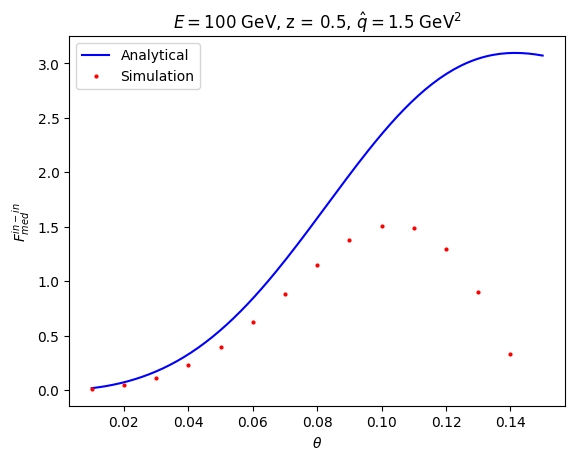

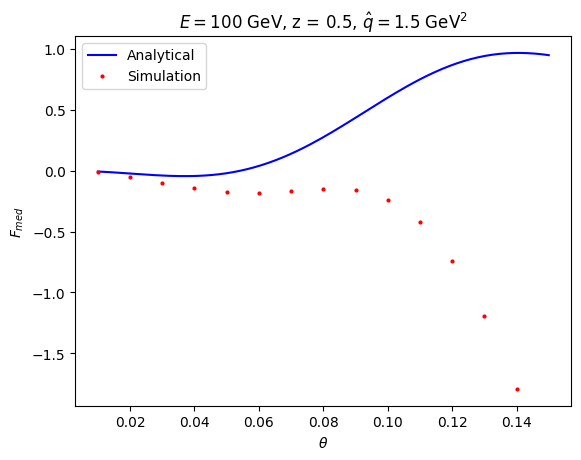

In [21]:
F_INOUT = .0 * Theta
for th in range(len(Theta)):
    F_INOUT[th] = sis.F_in_out(Theta[th])

THETA_1 = np.linspace(0.01, 0.15, 128)
F_INOUT_1 = .0 * THETA_1
Fp_an = THETA_1 * .0
for th in range(len(THETA_1)):
    Fp_an[th] = np.real(fasit2Ncdiagint(sis.t, sis.omega*THETA_1[th], 0, sis.z, sis.omega, sis.Omega, sis.qhat))
    F_INOUT_1[th] = sis.F_in_out(THETA_1[th])

plt.plot(THETA_1, THETA_1**2 / 2 * Fp_an, color = "blue", label = "Analytical")
plt.plot(Theta, Theta**2 / 2 * Fp_sim, "o", markersize = 2, color = "red", label = "Simulation")
plt.ylabel(r"$F_{med}^{in-in}$")
plt.xlabel(r"$\theta$")
plt.title(r"$E = 100$ GeV, z = $0.5$, $\hat{q} = 1.5$ GeV$^2$")
plt.legend()
plt.show()

plt.plot(THETA_1, THETA_1**2 / 2 * Fp_an + F_INOUT_1, color = "blue", label = "Analytical")
plt.plot(Theta, Theta**2 / 2 * Fp_sim + F_INOUT, "o", markersize = 2, color = "red", label = "Simulation")
plt.ylabel(r"$F_{med}$")
plt.xlabel(r"$\theta$")
plt.title(r"$E = 100$ GeV, z = $0.5$, $\hat{q} = 1.5$ GeV$^2$")
plt.legend()



In [21]:
print(sis.beta(sis.t))

5.730552099987822
